In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [139]:
df = pd.read_csv("Mall_Customers.csv")

In [140]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Cleaning

In [141]:
df = df.drop('CustomerID',axis=1)

In [142]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [143]:
df[(df['Age'] < 0) | (df['Age'] > 100)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


## Scaling

In [144]:
x = df[['Age', 'Spending Score (1-100)']]

In [145]:
x_scale = StandardScaler().fit_transform(x)

## Ploting Cluster Function

In [146]:
def plot_cluster(x, labels, ax=None, title="Scatterplot of Clusters", xlabel="X", ylabel="Y", figsize=(8,6)):
    unique_labels = np.unique(labels)
    
    plt.figure(figsize=figsize)

    for label in unique_labels:
        if label == -1:
            plt.scatter(
                x[labels == label, 0],
                x[labels == label, 1],
                c="black",
                s=40,
                label="Outliers",
                alpha=0.7
            )
        else:
            plt.scatter(
                x[labels == label, 0],
                x[labels == label, 1],
                s=40,
                label=f"Cluster {label + 1}",
                alpha=0.7
            )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.legend()
    plt.show()

## KMeans

In [147]:
wcss = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scale)
    wcss.append(km.inertia_)

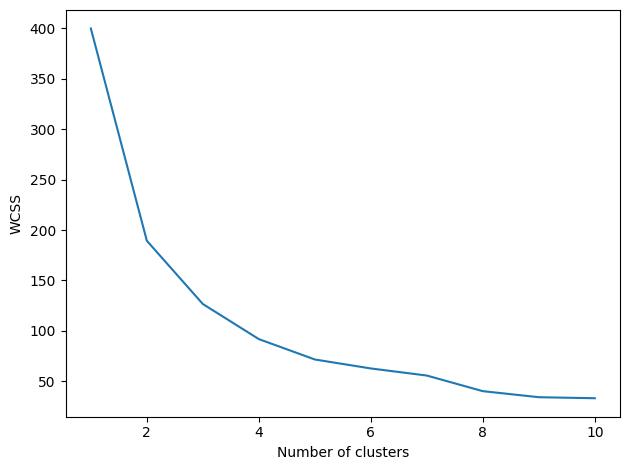

In [148]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.tight_layout()
plt.show()

In [149]:
n_cluster = 4
km = KMeans(n_clusters=n_cluster, random_state=42)
labels = km.fit_predict(x_scale)

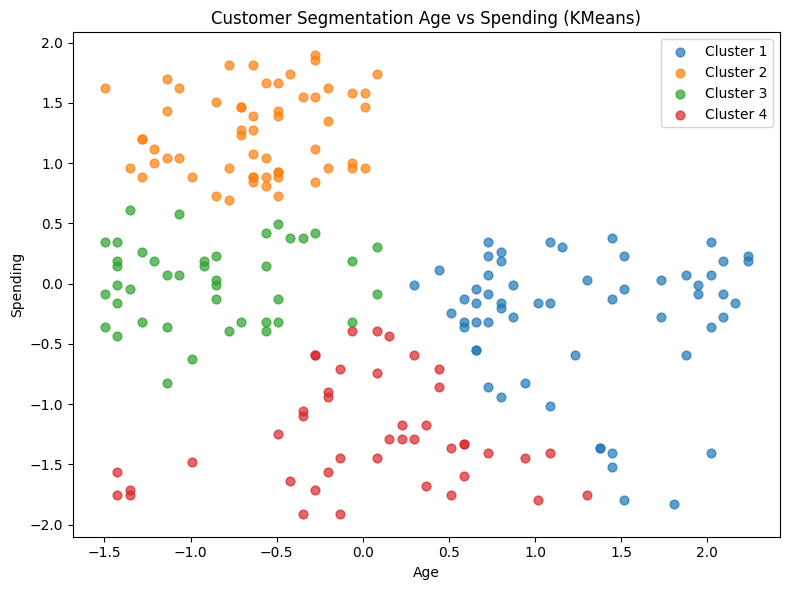

In [150]:
plot_cluster(x_scale, 
             labels=labels, 
             title="Customer Segmentation Age vs Spending (KMeans)",
             xlabel="Age",
             ylabel="Spending")

## PCA

In [151]:
pca = PCA(n_components=0.90)
x_pca = pca.fit_transform(x_scale)

In [152]:
pca.explained_variance_ratio_

array([0.66361342, 0.33638658])

In [171]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x_scale)
    wcss.append(km.inertia_)

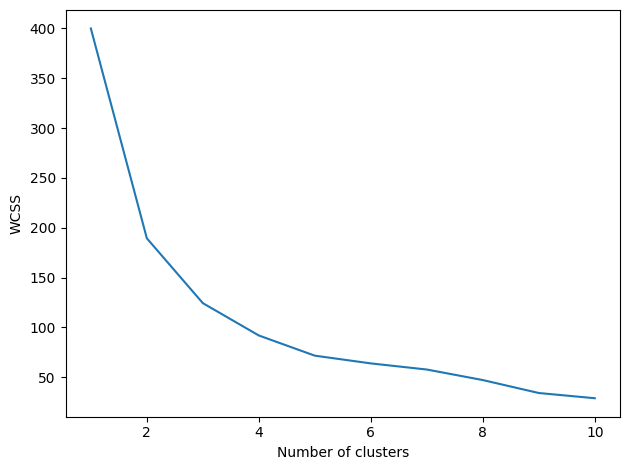

In [172]:
plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.tight_layout()
plt.show()

In [155]:
km = KMeans(n_clusters=4, random_state=42)
pca_labels = km.fit_predict(x_pca)

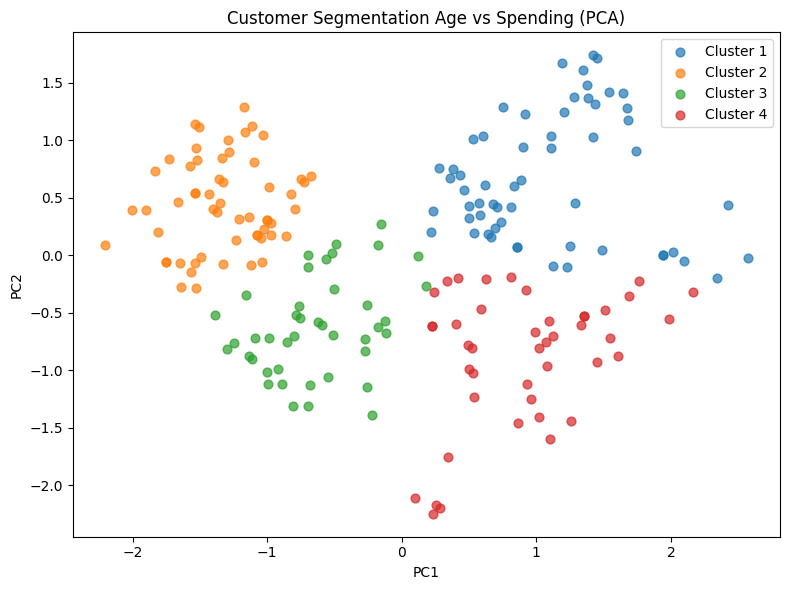

In [156]:
plot_cluster(x_pca,
             labels=pca_labels,
             title = "Customer Segmentation Age vs Spending (PCA)",
             xlabel="PC1",
             ylabel="PC2"
             )

## DBScan

In [183]:
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(x_scale)

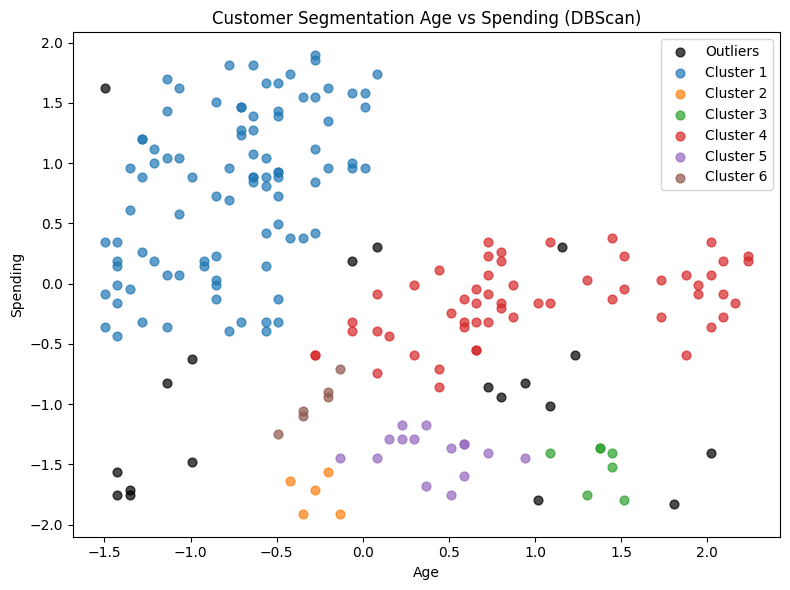

In [184]:
plot_cluster(x_scale,
             labels=db_labels,
             title="Customer Segmentation Age vs Spending (DBScan)",
             xlabel="Age",
             ylabel="Spending"
)

## Heirarchical

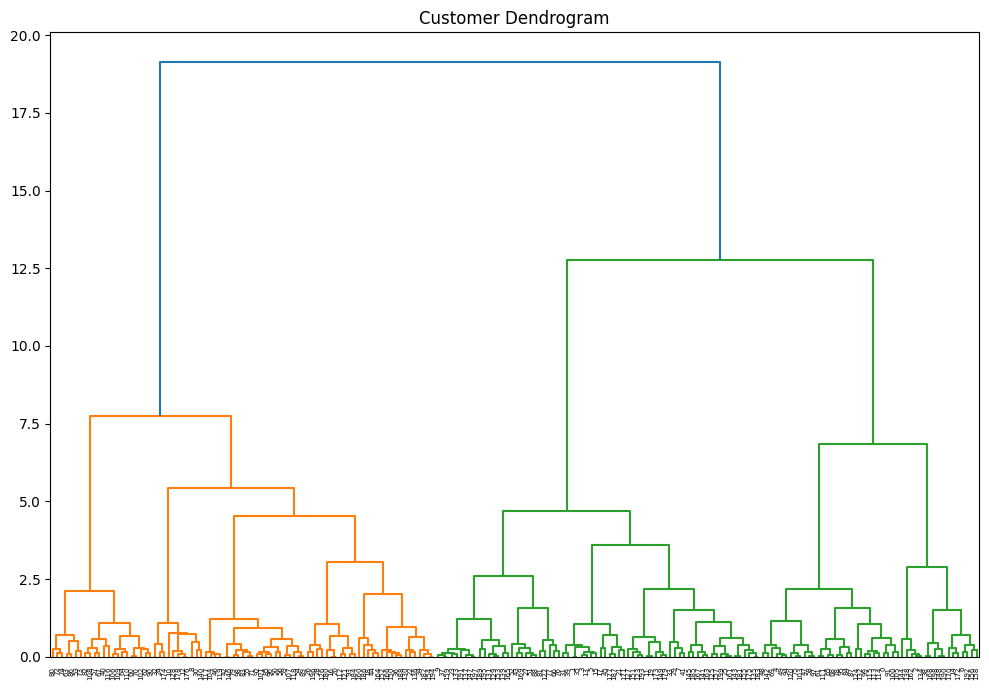

In [165]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(x_scale,method="ward"))
plt.tight_layout()
plt.show()

In [173]:
ag = AgglomerativeClustering(n_clusters=3, linkage="ward")
ag_labels = ag.fit_predict(x_scale)

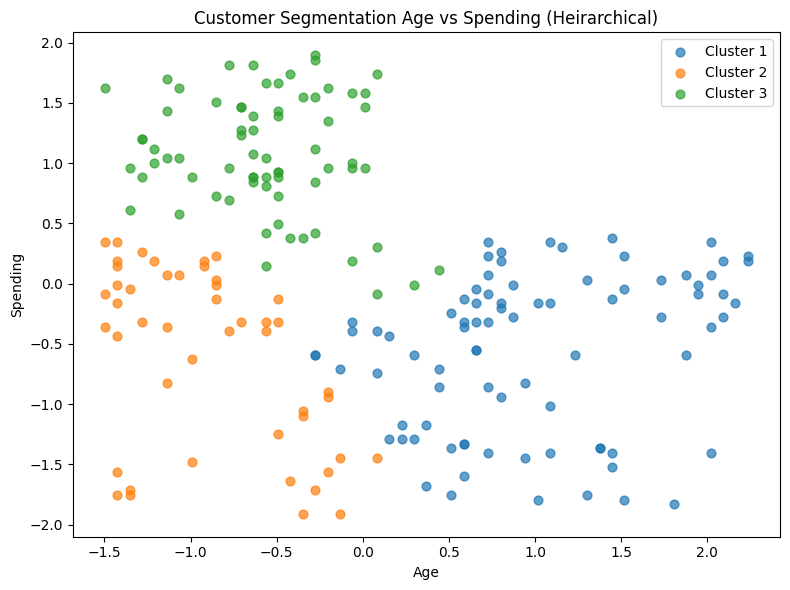

In [174]:
plot_cluster(
    x_scale,
    labels=ag_labels,
    title = "Customer Segmentation Age vs Spending (Heirarchical)",
    xlabel="Age",
    ylabel="Spending"
)